## Load the data and model for explanation

In [1]:
import pickle
import pandas as pd
df_train = pd.read_csv("../automl_tutorials/diabetes_train.csv")
df_test = pd.read_csv("../automl_tutorials/diabetes_test.csv")

In [2]:
!ls *model

diabetes_rf_sk.model


In [3]:
#from sklearn.ensemble import RandomForestRegressor
import joblib
from platform import python_version
import numpy as np
import sklearn
np.__version__

'2.1.3'

Use joblib instead of pickle

In [4]:
import joblib
#loaded_rf_sk_model = joblib.load('diabetes_rf_sk_model.joblib')

loaded_data = joblib.load('diabetes_rf_sk_model.joblib')
loaded_rf_sk_model = loaded_data['model']
metadata = loaded_data['metadata']

## this approach (of using pickle) also works (but the approach above is better with meta data; both approaches are sensitive to numpy version differences)
#import pickle
#filehandler = open(b"diabetes_rf_sk.model","rb")
#rf_sk_model = pickle.load(filehandler) # a random forest model

## Explanation workflow

In [6]:
import numpy as np
import lime
import lime.lime_tabular

variable_names = list(df_train.columns[0:10])
explainer_lime = lime.lime_tabular.LimeTabularExplainer(np.array(df_train.iloc[:,0:10]),
                                                        feature_names=variable_names, 
                                                        class_names=['target'], 
                                                        #categorical_features=categorical_features, 
                                                        verbose=True, 
                                                        mode='regression')

## Local interpretation of an instance (single patient)

In [7]:
## Let's explain a new patient
exp_instance = explainer_lime.explain_instance(df_test.iloc[10,0:10], 
                                               loaded_rf_sk_model.predict, 
                                               num_features=10)

/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Intercept 125.0414119644476
Prediction_local [218.70613043]
Right: 237.75384038965905


/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/envs/dltutorials/lib/python3.12/site-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

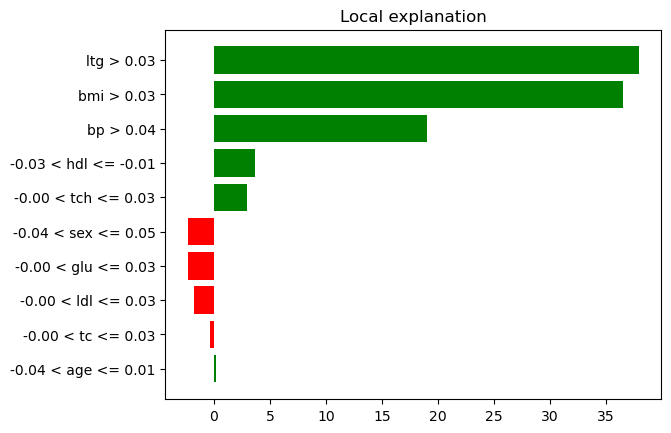

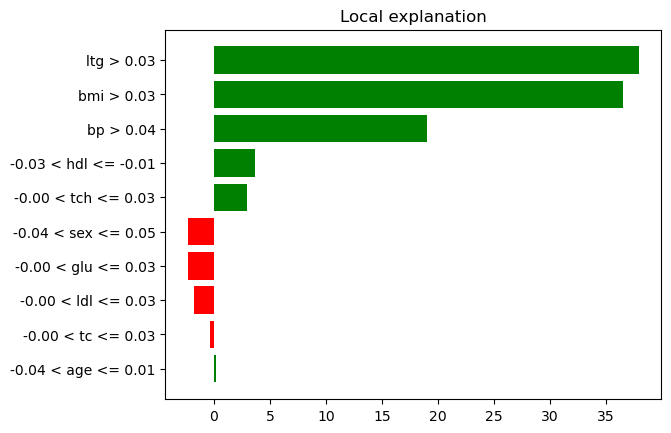

In [9]:
exp_instance.as_pyplot_figure()